# Logistic Regression Code

In [44]:
# Step 1: Load libraries and data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

In [45]:
# Load the dataset
data = pd.read_csv('../ML Assignment 2/BreastCancerData.csv')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [47]:
data.shape

(569, 6)

In [48]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [49]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [50]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [51]:
X = data[['mean_radius', 'mean_perimeter', 'mean_texture', 'mean_area', 'mean_smoothness']]
y = data['diagnosis']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X.shape, y.shape

((569, 5), (569,))

In [54]:
# Initialize the logistic regression model
model = LogisticRegression()

In [56]:
# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression()

# Accuracy Values

In [57]:
print("The Accuracy of Logistic Regression is : ",model.score(X_train,y_train))

The Accuracy of Logistic Regression is :  0.9120879120879121


In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [78]:
print("The Accuracy of Logistic Regression is : ",model.score(X_test,y_test))

The Accuracy of Logistic Regression is :  0.9298245614035088


# Confusion Matrix

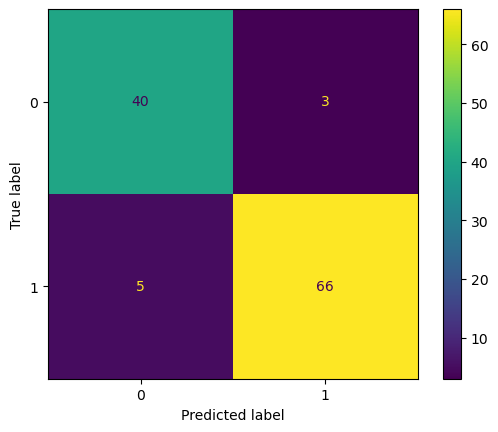

In [79]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
ConfusionMatrixDisplay(cm,display_labels=data['diagnosis'].unique()).plot()
plt.grid(False)

# Precision, Recall and F1-Score Values

In [80]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [63]:
print(precision)

0.9565217391304348


In [64]:
print(recall)

0.9295774647887324


In [65]:
print(f1)

0.9428571428571428


# ROC & AUC. Log Loss

In [66]:
# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
    
# Calculate log loss
logloss = log_loss(y_test, y_prob)

In [67]:
print(roc_auc)

0.9882083196855552


In [68]:
print(logloss)

0.15926247426103834


# MeanSquaredError & r2_score

In [69]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [70]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07017543859649122
R-squared: 0.7012774320340649


In [71]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[ 2.59820524 -0.62290751 -0.23393871  0.00645447 -0.43956467]]
Intercept: [21.74233441]


In [72]:
r2_score(y_test, y_pred)

0.7012774320340649

In [76]:
import seaborn as sns

In [75]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: diagnosis, Length: 114, dtype: int64

In [74]:
import numpy as np
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [73]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

# ROC Curve

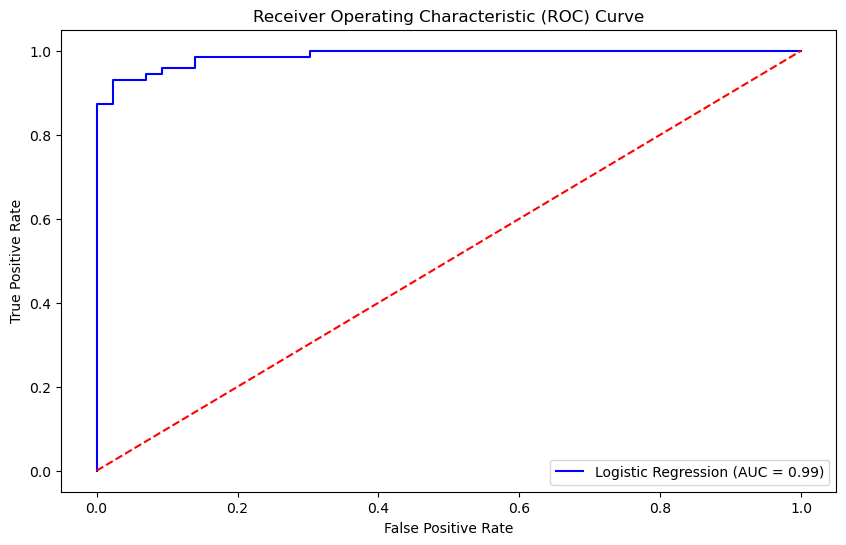

In [81]:
# Step 5: Visualize the results
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(model_fpr, model_tpr, color='blue', label=f'Logistic Regression (AUC = {model_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()